In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from water_at_saturation_properties import density, enthalpy, heat_capacity, conductivity, viscosity

In [15]:
def simplified_model_for_fit(x, a00, a01, a02, a03):
    
    c = np.array([a00, a01, a02, a03,])
    
    return simplified_model(x, c)

In [16]:
def simplified_model(x,c):

    f = 0.

    for i in range(c.shape[0]):
        f += c[i] * (x ** i)

    return f

In [17]:
def calculate_output(func,X,*args):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):                     
        Z[i,] = func(X[i],*args)
    return Z

In [18]:
def fit(model, X):

    Z = calculate_output(model,X)
    c, pcov = curve_fit(simplified_model_for_fit, X, Z)
    
    Z_fit = simplified_model(X,c)
    
    # residual sum of squares
    ss_res = np.sum((Z - Z_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((Z - np.mean(Z)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return (c, Z_fit, Z, r2)

In [19]:
from iapws.iapws97 import _Region4, _Region1
from iapws._iapws import _ThCond, _Viscosity

In [20]:
limits = [-1, 0]
npoints = 25
X = 1e5*np.logspace(limits[0], limits[1], num=npoints)
out = fit(density, X)
print(out)

(array([ 9.96906358e+02, -8.11519963e-04,  7.28615211e-09, -3.02080951e-14]), array([989.48956538, 988.8164593 , 988.09031153, 987.30861201,
       986.46910132, 985.56987057, 984.60947648, 983.58707085,
       982.50254157, 981.35665988, 980.15122433, 978.88918605,
       977.57473165, 976.21328775, 974.81139449, 973.37637151,
       971.91566725, 970.43573653, 968.94022942, 967.42718793,
       965.88483024, 964.28534201, 962.5758767 , 960.66567178,
       958.40778754]), array([989.8436374 , 989.03146892, 988.18362768, 987.29941716,
       986.3781039 , 985.41891647, 984.42104412, 983.38363541,
       982.30579673, 981.18659058, 980.02503377, 978.8200955 ,
       977.57069518, 976.27570016, 974.93392324, 973.54411995,
       972.10498574, 970.61515277, 969.07318658, 967.47758246,
       965.82676154, 964.11906654, 962.3527572 , 960.52600537,
       958.63688968]), 0.9996968680211483)


DENSITY


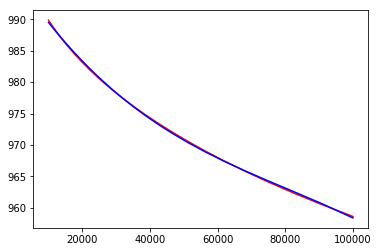

Parameters: [ 9.96906358e+02 -8.11519963e-04  7.28615211e-09 -3.02080951e-14]
R2: 0.9996968680211483


In [21]:
print("DENSITY")
c, Z_fit, Z, r2 = fit(density, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict = dict()
c_dict['density'] = c

ENTHALPY


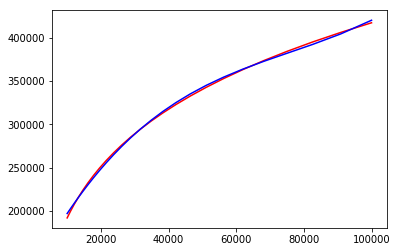

Parameters: [ 1.31488947e+05  7.28807358e+00 -7.84449119e-05  3.44521411e-10]
R2: 0.9989472814741913


In [22]:
print("ENTHALPY")
c, Z_fit, Z, r2 = fit(enthalpy, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['enthalpy'] = c

VISCOSITY
0.0005873203069963006
0.0005683284153536806
0.0005500853038736258
0.0005325546300428335
0.0005157022756221993
0.0004994961818598621
0.00048390619859815033
0.0004689039459748938
0.0004544626875528664
0.00044055721382898377
0.00042716373517981307
0.0004142597833933175
0.0004018241210200065
0.0003898366578508012
0.0003782783738952729
0.0003671312482932827
0.00035637819364604974
0.000346002995300457
0.0003359902551629447
0.00032632533965793316
0.0003169943314800811
0.00030798398482084804
0.0002992816837777614
0.00029087540368002626
0.0002827536750868485


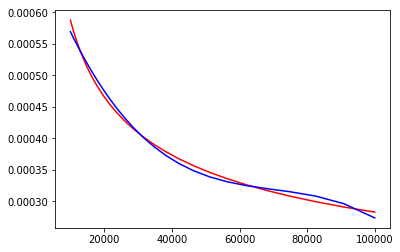

Parameters: [ 6.97318785e-04 -1.47128076e-08  1.98579652e-13 -9.38312502e-19]
R2: 0.993386025713022


In [23]:
print("VISCOSITY")
c, Z_fit, Z, r2 = fit(viscosity, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['viscosity'] = c

HEAT_CAPACITY


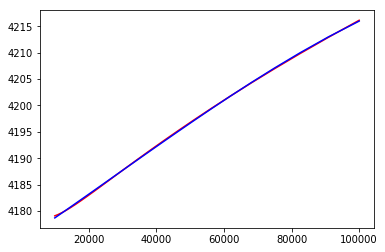

Parameters: [ 4.17429701e+03  4.31727962e-04  7.44863129e-10 -8.92950974e-15]
R2: 0.9998276406224097


In [24]:
print("HEAT_CAPACITY")
c, Z_fit, Z, r2 = fit(heat_capacity, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['heat_capacity'] = c

CONDUCTIVITY


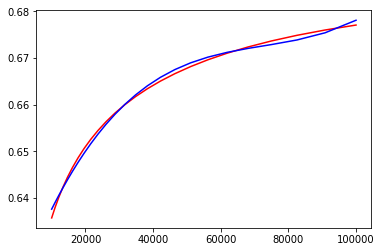

Parameters: [ 6.20940155e-01  1.90022194e-06 -2.45476728e-11  1.12611502e-16]
R2: 0.9960286787923832


In [25]:
print("CONDUCTIVITY")
c, Z_fit, Z, r2 = fit(conductivity, X)
plt.plot(X, Z, 'r') # plotting t, a separately 
plt.plot(X, Z_fit, 'b') # plotting t, b separately 
plt.show()
print("Parameters:",c)
print("R2:", r2)
c_dict['conductivity'] = c

In [26]:
import pprint
pprint.pprint(c_dict)

{'conductivity': array([ 6.20940155e-01,  1.90022194e-06, -2.45476728e-11,  1.12611502e-16]),
 'density': array([ 9.96906358e+02, -8.11519963e-04,  7.28615211e-09, -3.02080951e-14]),
 'enthalpy': array([ 1.31488947e+05,  7.28807358e+00, -7.84449119e-05,  3.44521411e-10]),
 'heat_capacity': array([ 4.17429701e+03,  4.31727962e-04,  7.44863129e-10, -8.92950974e-15]),
 'viscosity': array([ 6.97318785e-04, -1.47128076e-08,  1.98579652e-13, -9.38312502e-19])}
